In [5]:
import numpy as np
import pandas as pd
import json

In [6]:
df = pd.read_json('https://finances.worldbank.org/resource/kjmm-jfbk.json')

In [44]:
pd.set_option('display.max_columns', None)
df.head()

actual_2015_additional_passengers_upon_implementation_passengers_per_day  \
0                                                  0                          
1                                                  0                          
2                                                  0                          
3                                                  0                          
4                                                  0                          

   actual_2015_co_financing_bilateral_us_m  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   

   actual_2015_co_financing_govt_us_m  actual_2015_co_financing_mdb1_us_m  \
0                                   0                                32.0   
1                                   0                                 0.0   
2                                   0                                 0.0   
3                                   0                                 0.0   
4                                   0                                 9.0   

   actual_2015_co_financing_others_us_m  actual_2015_co_financing_pvt_us_m  \
0                                     0                                  0   
1                                     0                                  0   
2                                     0                                  0   
3                                     0                                  0   
4                                     0                                  0   

   actual_2015_co_financing_total_us_m  \
0                                   32   
1                                    0   
2                                    0   
3                                    0   
4                                    9   

   actual_2015_energy_savings_annual_gwh_yr  \
0                                         0   
1                                         0   
2                                       110   
3                                         0   
4                                         0   

   actual_2015_ghg_reductions_annual_tco2_yr  \
0                                        0.0   
1                                        0.0   
2                                   145800.0   
3                                        0.0   
4                                        0.0   

   actual_2015_installed_capacity_geothermal_mw  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   actual_2015_installed_capacity_hydro_mw  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   

   actual_2015_installed_capacity_mixed_mw  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   

   actual_2015_installed_capacity_solar_mw  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   

   actual_2015_installed_capacity_total_mw  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   

   actual_2015_installed_capacity_wind_mw  country  ctf_funding_usd  \
0       

In [8]:
df.dtypes

actual_2015_additional_passengers_upon_implementation_passengers_per_day      int64
actual_2015_co_financing_bilateral_us_m                                       int64
actual_2015_co_financing_govt_us_m                                            int64
actual_2015_co_financing_mdb1_us_m                                          float64
actual_2015_co_financing_others_us_m                                          int64
actual_2015_co_financing_pvt_us_m                                             int64
actual_2015_co_financing_total_us_m                                           int64
actual_2015_energy_savings_annual_gwh_yr                                      int64
actual_2015_ghg_reductions_annual_tco2_yr                                   float64
actual_2015_installed_capacity_geothermal_mw                                  int64
actual_2015_installed_capacity_hydro_mw                                       int64
actual_2015_installed_capacity_mixed_mw                                     

In [50]:
# Finding projects(unique)  using the unique method 
df['project_title'].unique()

array(['Clean and Efficient Energy Project',
       'Commercial Sustainable Energy Finance(CSEF) Phase II',
       'Commercializing  Sustainable Energy Finance Program (CSEF)',
       'Concentrated Solar Power Project (CSPP)',
       'District Heating Energy Efficiency',
       'District Heating Modernisation Program',
       'District Heating Modernization Framework',
       'ECOCASA Program-Energy Efficiency Program Part II', 'EE Program',
       'Efficient Lighting and Appliance Project',
       'Energy Efficiency and Self-Supply Renewable Energy Program',
       'Energy Efficiency Financing Program for the Services Sector',
       'Energy Efficiency Program in the San Andrés, Providencia and Santa Catalina Archipelago',
       'Energy Efficiency Program-Part 1',
       'Energy Efficient Electric Vehicles project',
       'ESKOM Renewable Support Project-CSP',
       'ESKOM Renewable Support Project-Wind',
       'Expansion of the Approved South Africa Sustainable Energy Acceleratio

In [49]:
# Finding the number of projects(unique) using the nunique method 
df['project_title'].nunique()

81

In [11]:
# Number of projects funded under different categories of focussed technology using the value_counts() method 
df['technology_focus'].value_counts()

Renewable Energy                        50
Energy Efficiency                       22
Transport                                8
Renewable Energy / Energy Efficiency     7
Name: technology_focus, dtype: int64

Text(0.5, 1.0, 'Number of projects by technology')

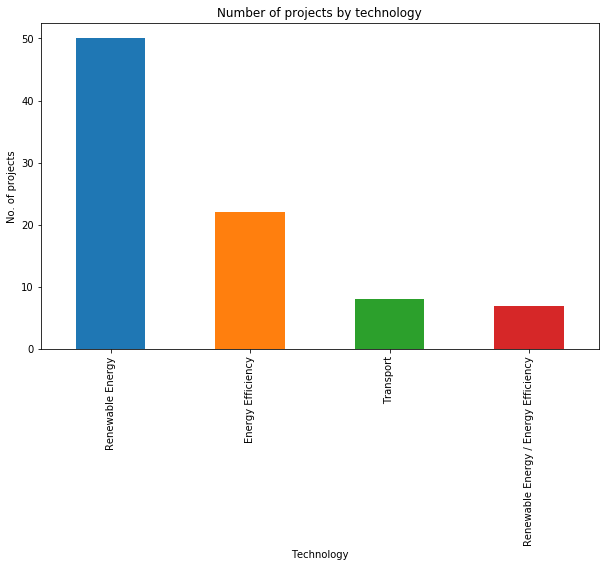

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline
df['technology_focus'].value_counts().plot(kind = 'bar', figsize = (10,6))
plt.xlabel('Technology')
plt.ylabel('No. of projects')
plt.title('Number of projects by technology')

In [26]:
#Different multilateral development banks and the number of projects funded by them using the value_counts() method
df['mdb_1'].value_counts()

IBRD    21
IDB     20
IFC     16
EBRD    14
ADB     10
AfDB     6
Name: mdb_1, dtype: int64

Text(0.5, 1.0, 'No. of projects undertaken by different MDBs')

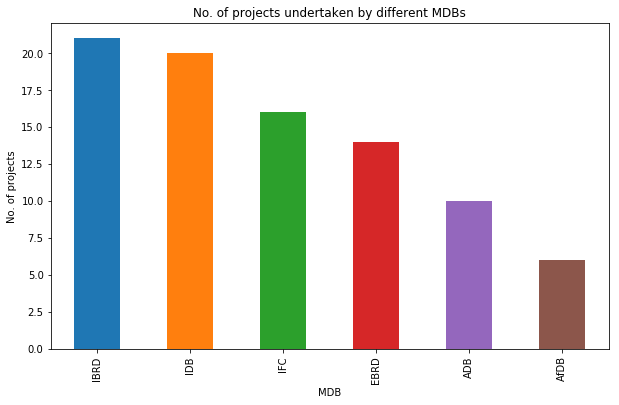

In [43]:
df['mdb_1'].value_counts().plot(kind = 'bar', figsize = (10,6))
plt.xlabel('MDB')
plt.ylabel('No. of projects')
plt.title('No. of projects undertaken by different MDBs')

In [27]:
df.groupby(['region'])['ctf_funding_usd'].sum()

region
Africa                         1288
Asia                           1593
Europe and Central Asia         904
Latin America and Caribbean     905
Name: ctf_funding_usd, dtype: int64

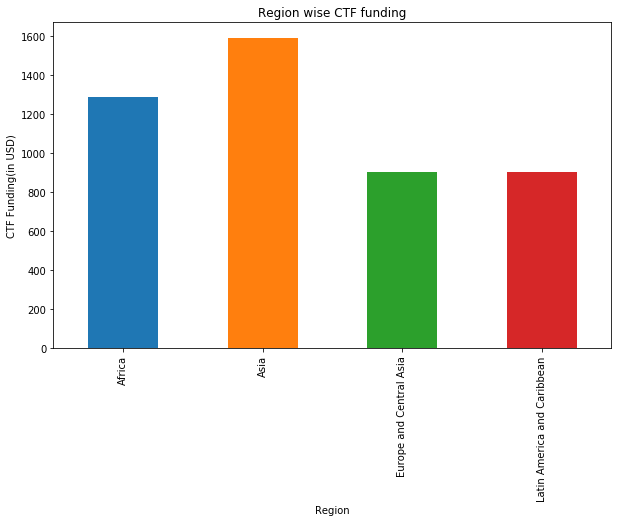

In [28]:
df.groupby(['region'])['ctf_funding_usd'].sum().plot(kind = 'bar', figsize = (10,6))
plt.xlabel('Region')
plt.ylabel('CTF Funding(in USD)')
plt.title('Region wise CTF funding')
plt.show()

Text(0.5, 1.0, 'Number of public and private investments')

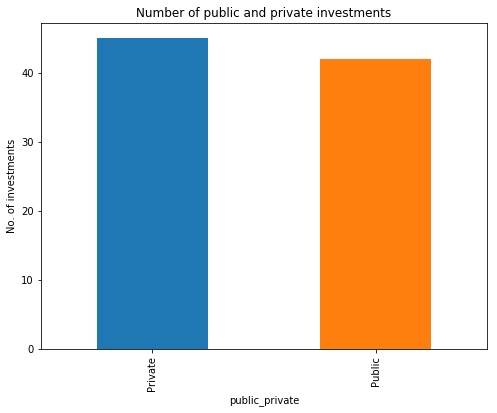

In [35]:
# Number of public and private investments in 2017
df.groupby(['public_private'])['ry'].count().plot(kind =  'bar', figsize = (8,6))
plt.ylabel('No. of investments')
plt.title('Number of public and private investments')

In [68]:
df.groupby('region').cumulative_co_financing_total_us_m.agg(['max','mean'])

max        mean
region                                         
Africa                       1502.0  340.384615
Asia                          982.0  108.520000
Europe and Central Asia      3000.0  227.916667
Latin America and Caribbean  3550.0  337.227273

Text(0.5, 1.0, 'Regionwise Max and Mean Cumulative co-financing')

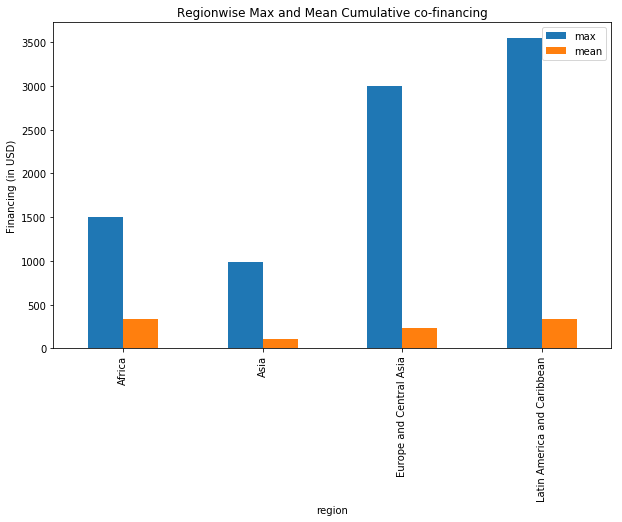

In [75]:
df.groupby('region').cumulative_co_financing_total_us_m.agg(['max','mean']).plot(kind = 'bar', figsize = (10,8))
plt.ylabel('Financing (in USD)')
plt.title('Regionwise Max and Mean Cumulative co-financing')

In [73]:
df.groupby('public_private').cumulative_co_financing_total_us_m.agg(['max','mean'])

max        mean
public_private                    
Private         1502.0  150.000000
Public          3550.0  326.833333

Text(0.5, 1.0, 'Max and Mean Public and Private financing')

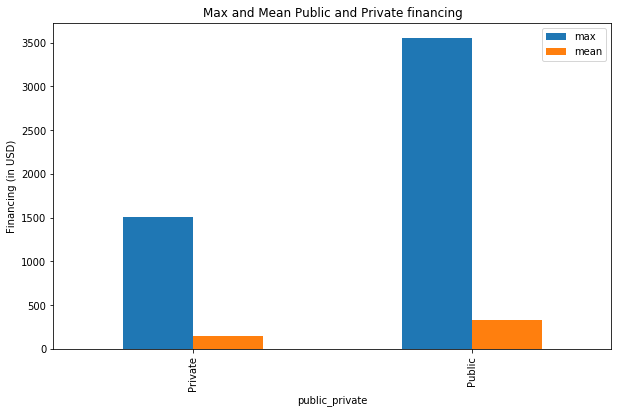

In [77]:
df.groupby('public_private').cumulative_co_financing_total_us_m.agg(['max','mean']).plot(kind = 'bar', figsize = (10,6))
plt.ylabel('Financing (in USD)')
plt.title('Max and Mean Public and Private financing')

In [129]:
Expected = df.groupby(['region'])['expected_co_financing_total_us_m'].sum()
Actual = df.groupby(['region'])['actual_2015_co_financing_total_us_m'].sum()

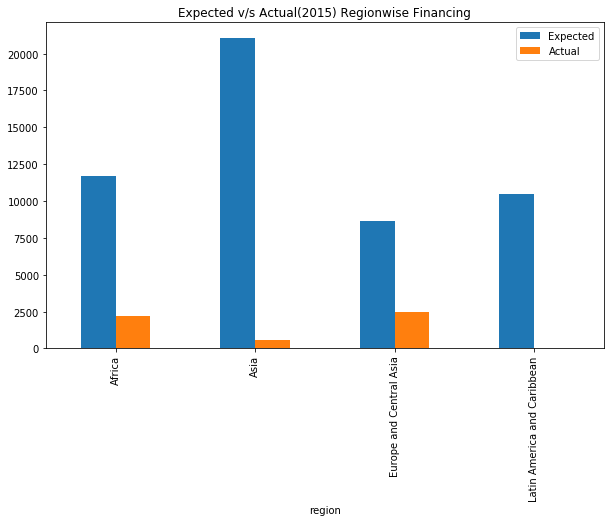

In [131]:
pd.DataFrame({'Expected':Expected,
              'Actual': Actual}).plot(kind = 'bar', figsize = (10,6), title = 'Expected v/s Actual(2015) Regionwise Financing')

In [119]:
G = df.groupby(['region']).expected_co_financing_govt_us_m.sum()
P = df.groupby(['region']).expected_co_financing_pvt_us_m.sum()
M = df.groupby(['region']).expected_co_financing_mdb1_us_m.sum()
B = df.groupby(['region']).expected_co_financing_bilateral_us_m.sum()
O = df.groupby(['region']).expected_co_financing_others_us_m.sum()

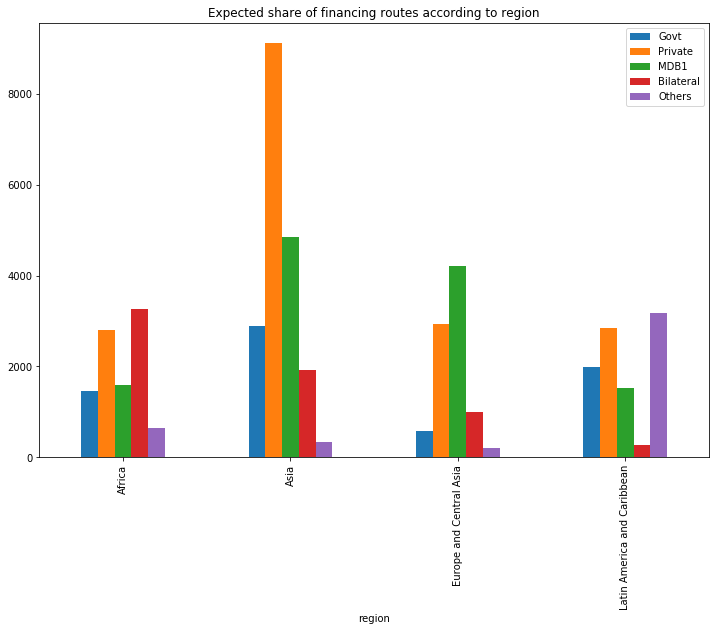

In [120]:
pd.DataFrame({'Govt':G, 
              'Private': P, 
              'MDB1':M, 
              'Bilateral': B,
              'Others': O}).plot(kind = 'bar', 
                                 figsize = (12,8),
                                 title = 'Expected share of financing routes according to region')

In [124]:
GA = df.groupby(['region']).actual_2015_co_financing_govt_us_m.sum()
PA = df.groupby(['region']).actual_2015_co_financing_pvt_us_m.sum()
MA = df.groupby(['region']).actual_2015_co_financing_mdb1_us_m.sum()
BA = df.groupby(['region']).actual_2015_co_financing_bilateral_us_m.sum()
OA = df.groupby(['region']).actual_2015_co_financing_others_us_m.sum()

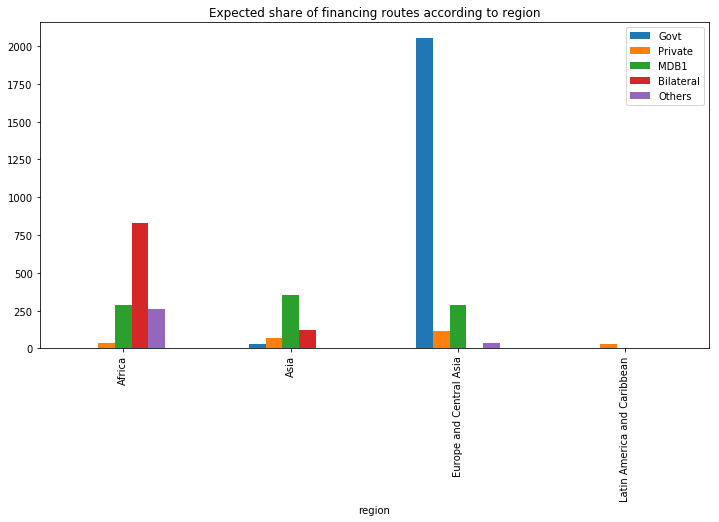

In [126]:
pd.DataFrame({'Govt':GA, 
              'Private': PA, 
              'MDB1':MA, 
              'Bilateral': BA,
              'Others': OA}).plot(kind = 'bar', 
                                 figsize = (12,6),
                                 title = 'Expected share of financing routes according to region')

In [106]:
df.groupby(['country'])['ctf_funding_usd'].sum().sort_values(ascending = False).head(10)

country
India            725
Mexico           518
South Africa     493
MENA-CSP         435
Turkey           405
Indonesia        375
Ukraine          337
Chile            192
Vietnam          180
DPSP-Regional    174
Name: ctf_funding_usd, dtype: int64

Text(0.5, 1.0, 'Top 10 countries with the most CTF Funding(in USD)')

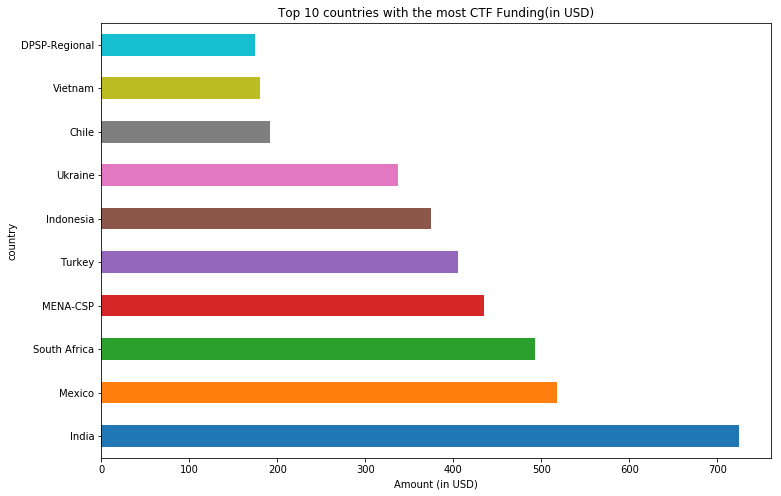

In [111]:
df.groupby(['country'])['ctf_funding_usd'].sum().sort_values(ascending = False).head(10).plot(kind = 'barh', figsize = (12,8))
plt.xlabel('Amount (in USD)')
plt.title('Top 10 countries with the most CTF Funding(in USD)')

In [116]:
GHG = df.groupby(['country'])['expected_ghg_reductions_annual_tco2_yr'].sum().sort_values(ascending = False).head(10)
GHG

country
India            18015635
Indonesia         9530000
Mexico            7120742
Turkey            6343371
Ukraine           4752683
Morocco           4125518
South Africa      2216667
Philippines       1722262
DPSP-Regional     1521000
Egypt             1400000
Name: expected_ghg_reductions_annual_tco2_yr, dtype: int64

Text(0.5, 0, 'tonnes of co2 (tco2)')

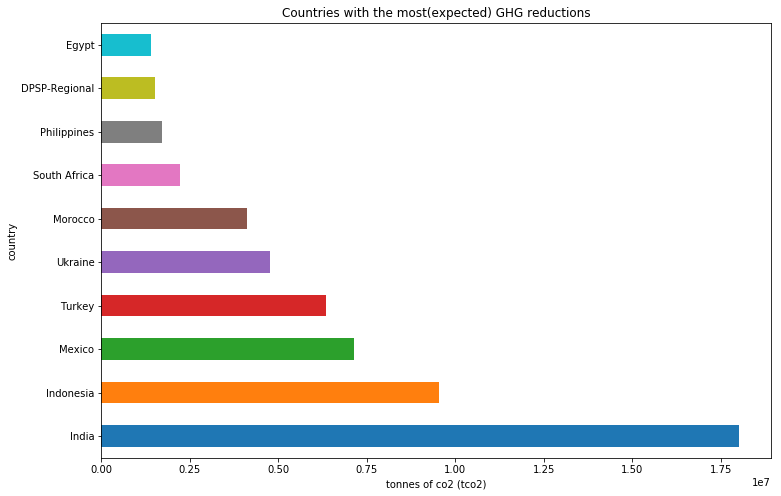

In [118]:
GHG.plot(kind = 'barh', figsize = (12,8), title = 'Countries with the most(expected) GHG reductions')
plt.xlabel('tonnes of co2 (tco2)')

In [139]:
cum_ghg_red = df.groupby(['country'])['cumulative_ghg_reductions_annual_tco2_yr'].sum().sort_values(ascending = False).head(10)

Text(0.5, 0, 'tonnes of co2 (tco2)')

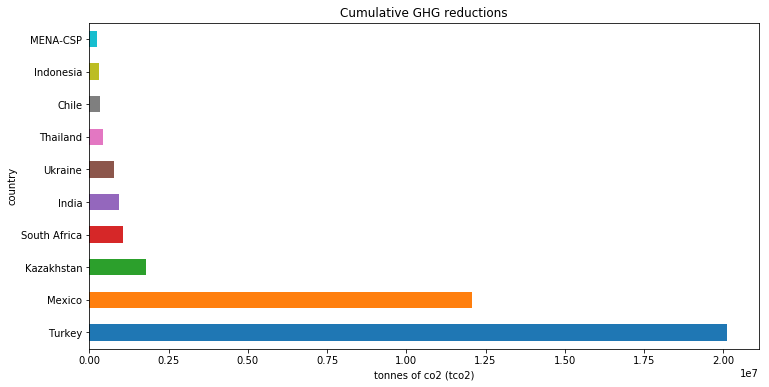

In [143]:
cum_ghg_red.plot(kind = 'barh', figsize = (12,6), title = 'Cumulative GHG reductions')
plt.xlabel('tonnes of co2 (tco2)')

Text(0.5, 0, 'Amount(in USD)')

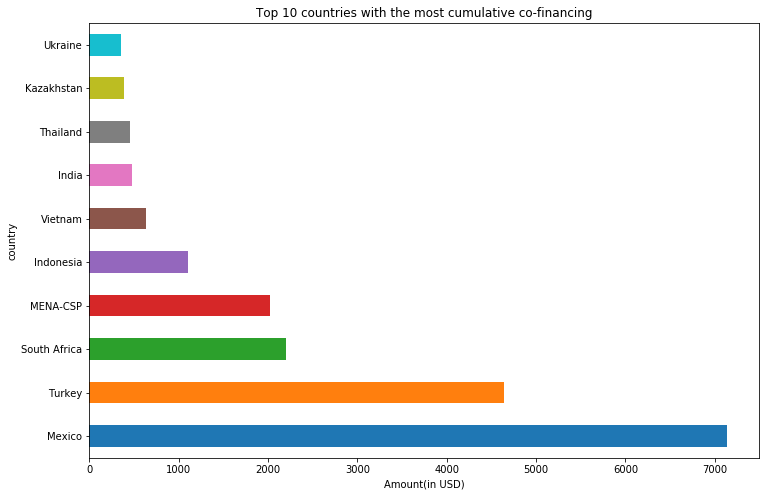

In [151]:
Cum_cofinancing = df.groupby(['country'])['cumulative_co_financing_total_us_m'].sum().sort_values(ascending = False).head(10)
Cum_cofinancing.plot(kind = 'barh', figsize = (12,8), title = 'Top 10 countries with the most cumulative co-financing')
plt.xlabel('Amount(in USD)')